In [1]:
import sys
sys.path.append('../../ABEL')
from abel import *
from abel.utilities import larmor as lr
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time
import scipy.constants as SI 
import abel.utilities.plasma_physics as pp
import matplotlib.pyplot as plt

In [3]:
## define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 50e-6 # [m]
driver.z_offset = 580e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 5, 5 #30e-3, 30e-3 [m]
driver.num_particles = 100000
driver.jitter.x = 0#2e-7 # [m] 2e-6
driver.jitter.y = 0#2e-7 # [m] 100e-9
driver.jitter.t = 0 #10e-15 # [m]
driver.symmetrize = True
driver.seed = 1

test_particle = SourceSingleParticle()
test_particle.energy = 1500e9 # [eV]
test_particle.x_offset = 8.4e-6/2 # [m]
test_particle.y_offset = 8.4e-6/2 # [m]
test_particle.y_angle = 0 #test_particle.x_offset/pp.beta_matched(2e21, test_particle.energy)
test_particle.x_angle = 0

# define a stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 11 # [m]
stage.plasma_density = 2e21 # [m^-3]
stage.nom_energy_gain = 31.9e9/(11/stage.length) # [eV]
stage.radiation_reaction = True
stage.ion_motion = False
stage.beam_ionization=False
stage.ramp_beta_mag = 5
stage.num_nodes = 13
stage.test_particle_source = test_particle

# define witness bunch
witness = SourceBasic()
witness.charge = -1e10 * SI.e # [C]
witness.energy = 1500e9 # [eV]
witness.rel_energy_spread = 0.0
witness.bunch_length = 28e-6 # [m]
witness.z_offset = 0 # [m]
witness.emit_nx, witness.emit_ny = 160e-6, 0.56e-6 # [m rad]
witness.beta_x = stage.matched_beta_function(witness.energy)
witness.beta_y = witness.beta_x
witness.num_particles = 50000
witness.x_offset, witness.y_offset = 0, 0 # [m]
witness.jitter.x = 0
witness.symmetrize = True
witness.seed = driver.seed
test_particle.z_offset = witness.z_offset # [m]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

linac = Linac()
linac.stage = stage
linac.source = witness
linac.num_stages = 1
shots = 4

In [4]:
linac.run(f'linac_hipace_RR_{stage.radiation_reaction}', num_shots=shots, overwrite=False, parallel=True);

Output()

>> SHOT 4 already exists and will not be overwritten.
>> SHOT 3 already exists and will not be overwritten.
>> SHOT 2 already exists and will not be overwritten.
>> SHOT 1 already exists and will not be overwritten.


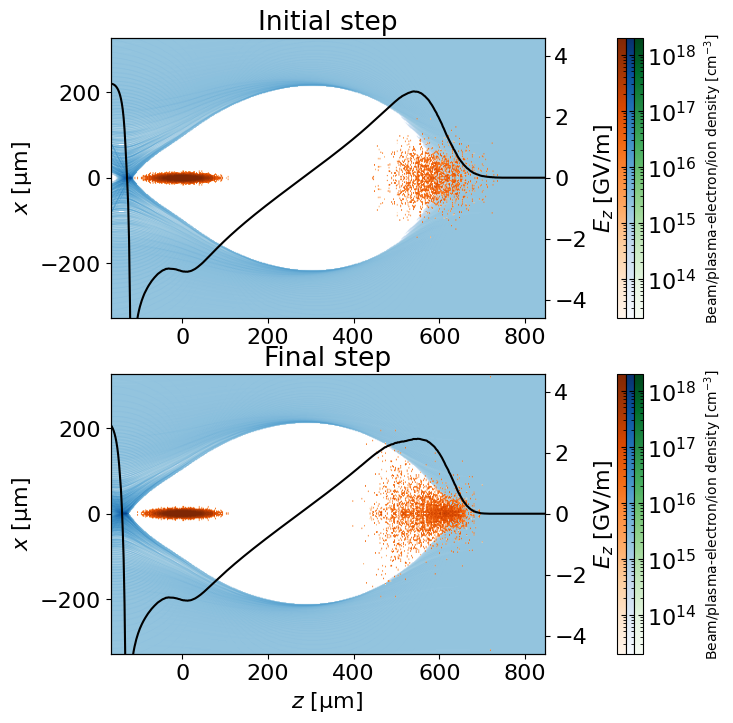

In [5]:
fig = linac.stages[0].plot_wake()

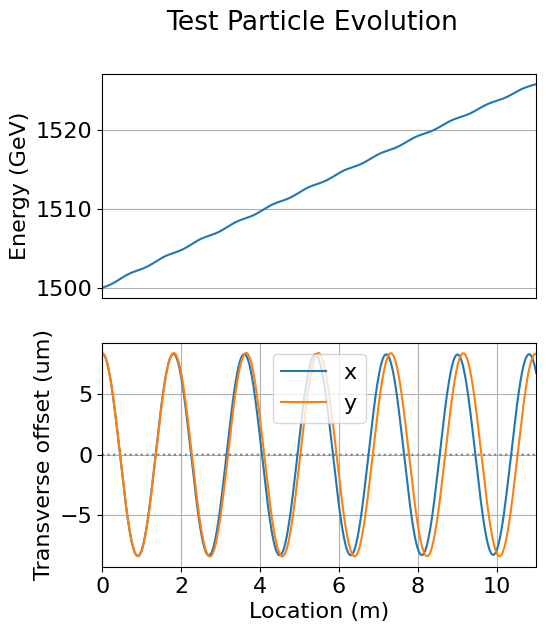

8.4e-06


In [6]:
fig1, E1 = linac.stages[0].plot_test_particle_evolution()
xps, yps = linac.stages[0].test_particle_evolution.xp, linac.stages[0].test_particle_evolution.yp
gammas = E1*SI.e/SI.m_e/SI.c**2
print(linac.stages[0].test_particle_evolution.x[0])
z = np.linspace(0,stage.length, len(E1))
#fig1.savefig('Plots/hipace_test_particle_evolution.png', bbox_inches='tight')

In [7]:
z, P = lr.larmor_formula(z, xps, yps, gammas)

Text(0.5, 1.0, 'Radiated Power of a Single Particle in HiPACE++')

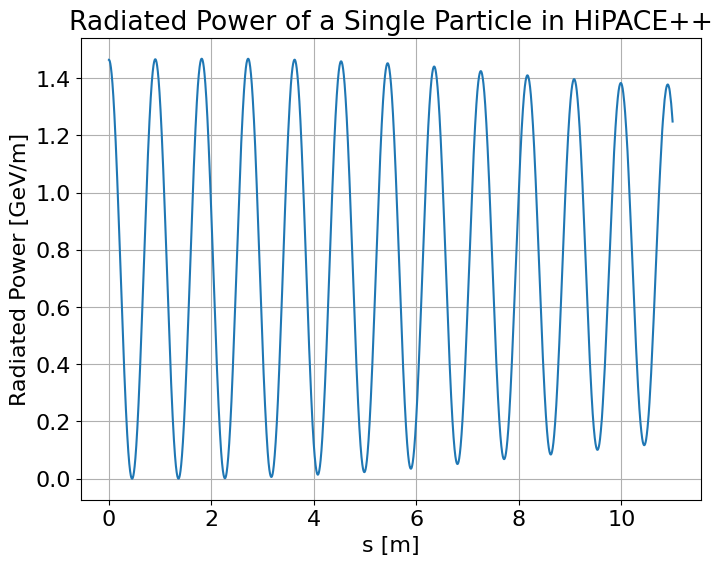

In [8]:
fig = plt.figure(figsize =(8,6))
plt.plot(z, P/SI.e/1e9)
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('Radiated Power [GeV/m]')
plt.title(f'Radiated Power of a Single Particle in HiPACE++')
#fig.savefig(f'Plots/hipace_energy_loss_benchmark_1500_GeV.png')

In [9]:
## define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 50e-6 # [m]
driver.z_offset = 580e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 5, 5 #30e-3, 30e-3 [m]
driver.num_particles = 100000
driver.jitter.x = 0#2e-7 # [m] 2e-6
driver.jitter.y = 0#2e-7 # [m] 100e-9
driver.jitter.t = 0 #10e-15 # [m]
driver.symmetrize = True
driver.seed = 1

test_particle = SourceSingleParticle()
test_particle.energy = 1500e9 # [eV]
test_particle.x_offset = 3e-6/2 # [m]
test_particle.y_offset = 3e-6/2 # [m]
test_particle.y_angle = 0 #test_particle.x_offset/pp.beta_matched(2e21, test_particle.energy)
test_particle.x_angle = 0

# define a stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 11 # [m]
stage.plasma_density = 2e21 # [m^-3]
stage.nom_energy_gain = 31.9e9/(11/stage.length) # [eV]
stage.radiation_reaction = False
stage.ion_motion = False
stage.beam_ionization=False
stage.ramp_beta_mag = 5
stage.num_nodes = 13
stage.test_particle_source = test_particle

# define witness bunch
witness = SourceBasic()
witness.charge = -1e10 * SI.e # [C]
witness.energy = 1500e9 # [eV]
witness.rel_energy_spread = 0.0
witness.bunch_length = 28e-6 # [m]
witness.z_offset = 0 # [m]
witness.emit_nx, witness.emit_ny = 160e-6, 0.56e-6 # [m rad]
witness.beta_x = stage.matched_beta_function(witness.energy)
witness.beta_y = witness.beta_x
witness.num_particles = 50000
witness.x_offset, witness.y_offset = 0, 0 # [m]
witness.jitter.x = 0
witness.symmetrize = True
witness.seed = driver.seed
test_particle.z_offset = witness.z_offset # [m]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

linac2 = Linac()
linac2.stage = stage
linac2.source = witness
linac2.num_stages = 1
shots = 4

In [10]:
linac2.run(f'linac_hipace_RR_{stage.radiation_reaction}', num_shots=shots, overwrite=True, parallel=True);

Output()

>> Finished HiPACE++ (job 6922172): 100%|██████████| 7487/7487 [03:54<00:00, 31.87 steps/s] 

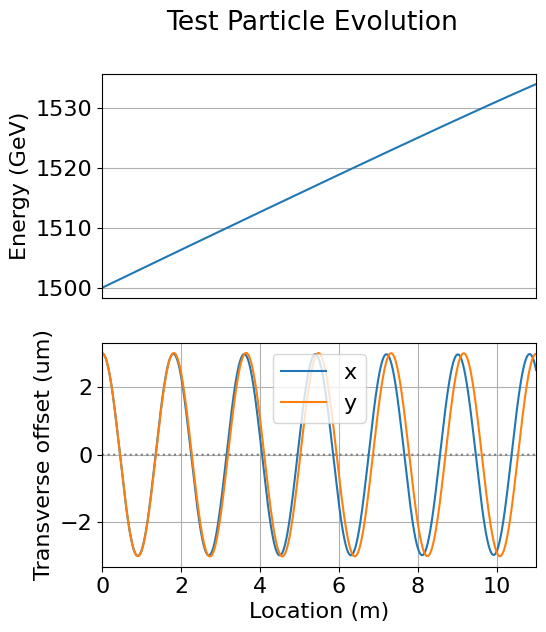

In [11]:
fig2, E2 = linac2.stages[0].plot_test_particle_evolution()
z = np.linspace(0,stage.length, len(E1))
#fig2.savefig('hipace_stage_evolution', bbox_inches = 'tight')

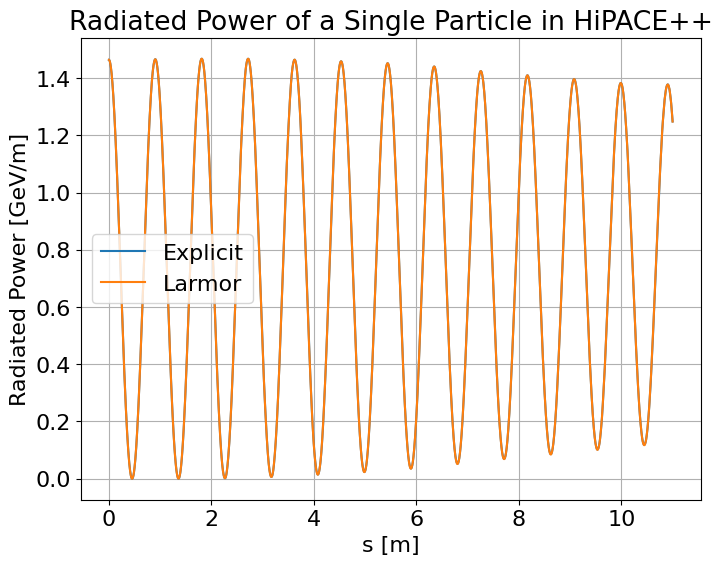

In [12]:
P_act = np.zeros(E1.size-1)
dz = z[1]-z[0]
s = np.empty_like(P_act)
for i in range(P_act.size):
    P_act[i] = ((E2[i+1]-E2[i])-(E1[i+1]-E1[i]))/dz/1e9
    s[i] = 1/2*(z[i+1]+z[i])

fig = plt.figure(figsize =(8,6))
plt.plot(s, P_act, label = 'Explicit')
plt.plot(s, P/SI.e/1e9, label = 'Larmor')
plt.title('Energy Loss')
plt.xlabel('s [m]')
plt.ylabel('Radiated Power [GeV/m]')
plt.title(f'Radiated Power of a Single Particle in HiPACE++')
plt.legend()
plt.grid()
#fig.savefig(f'Plots/hipace_energy_loss_benchmark_1500_GeV.png')

In [13]:
print(linac.stages[-1].test_particle_evolution.x[0])
x0 = linac.stages[-1].test_particle_evolution.x[0]

8.4e-06


In [14]:
z, energy_loss_larmor = lr.mean_larmor_formula(z, stage.plasma_density, \
                        gammas, x0, x0)

Text(0.5, 1.0, 'Energy Loss for an Initial Energy of 1500 GeV')

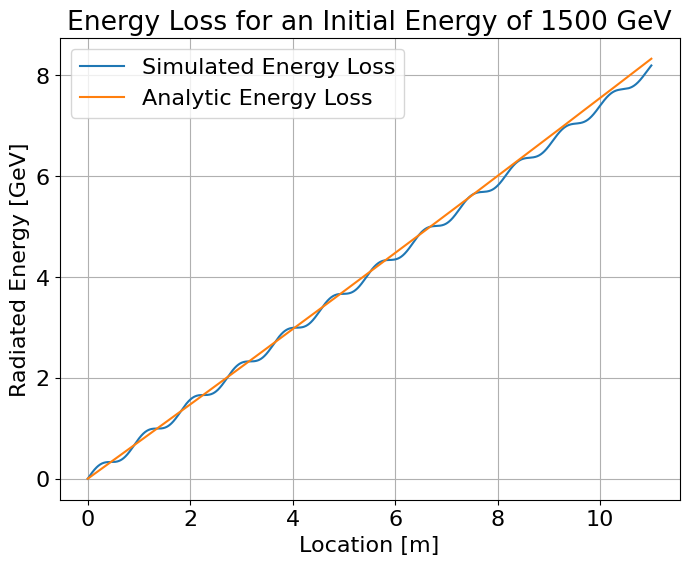

In [15]:
fig = plt.figure(figsize =(8,6))

plt.plot(z, (E2-E1)/1e9, label = 'Simulated Energy Loss')
plt.plot(z, energy_loss_larmor/SI.e/1e9, label = 'Analytic Energy Loss')

plt.grid()
plt.legend()
plt.xlabel('Location [m]')
plt.ylabel('Radiated Energy [GeV]')
plt.title(f'Energy Loss for an Initial Energy of 1500 GeV')
#fig.savefig('Plots/hipace_energy_loss_as_a_function_of_z_1500_GeV.png')

In [23]:
energy_spread = [linac[i].stages[-1].evolution.rel_energy_spread[-1] for \
i in range(shots)]
energy_spread_random = [linac2[i].stages[-1].evolution.rel_energy_spread[-1] for \
i in range(shots)]
wp = np.sqrt(stage.plasma_density*SI.e**2/SI.m_e/SI.epsilon_0)
kp = wp/SI.c
gamma = witness.energy*SI.e/SI.m_e/SI.c**2
sig_x2 = (np.sqrt(2/gamma)*witness.emit_nx/kp)
sig_y2 = (np.sqrt(2/gamma)*witness.emit_ny/kp)
k_beta = kp/np.sqrt(2*gamma)
print((0.00123-0.00119)/0.00119)

predicted_energy_spread = SI.e**2/6/np.pi/SI.epsilon_0 * (gamma*k_beta)**4*\
np.sqrt((sig_x2**2+sig_y2**2))*stage.length/(witness.energy*SI.e)
print(spread_in_spread)
print('pred rel spread: ', predicted_energy_spread)
print('actual rel spread: ', np.mean(energy_spread))
print('random spread :', np.mean(energy_spread_random))
print('adjusted spread is :', np.sqrt(np.mean(energy_spread)**2-np.mean(energy_spread_random)**2))

0.03361344537815116
1.2351316445704356e-11
pred rel spread:  0.001193724124188782
actual rel spread:  0.0014702919030343774
random spread : 0.0008040425042752757
adjusted spread is : 0.0012309646345233457
